# Multiple Trees on MNIST

In [23]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
import numpy as np
from numpy import linalg as LA
import pandas as pd
import matplotlib.pyplot as plt
import time

In [24]:
# Load the data and labels
data = np.float64(np.load('./MNIST.npy'))
labels = np.float32(np.load('./MNIST_labels.npy'))

# Divide the data into training, testing, and development
training = data[0:50000]
training_label = labels[0:50000]
val = data[50000:60000]
val_label = labels[50000:60000]
test = data[60000:]
test_label = labels[60000:]
train_val = np.concatenate((training, val), axis = 0)
train_val_label = np.concatenate((training_label, val_label), axis = 0)

In [25]:
train_val.shape

(60000, 784)

## (a)

In [14]:
# First test on random parameters
num_trees = 5
num_features = 50
num_nodes = 1000

clf = RandomForestClassifier(n_estimators=num_trees, min_samples_split=num_nodes,criterion="entropy", max_features=num_features)

In [6]:
clf.fit(training, training_label)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features=50, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=1000,
            min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [7]:
val_pred = clf.predict(val)

In [8]:
val_pred

array([7., 6., 1., ..., 4., 8., 6.], dtype=float32)

In [9]:
np.count_nonzero(val_label - val_pred)

1715

In [10]:
val_pred_prob = clf.predict_proba(val)

In [11]:
val_pred_prob[0]

array([0.00000000e+00, 0.00000000e+00, 9.71480601e-04, 2.40140938e-03,
       9.74567116e-04, 1.38121547e-04, 4.18994413e-04, 9.91195615e-01,
       2.79329609e-04, 3.62048211e-03])

In [26]:
# Function to compute error rate
def compute_error_rate(model, data, data_label):
    pred = model.predict(data)
    num_error = np.count_nonzero(data_label - pred)
    error_rate = num_error / pred.shape[0]
    return error_rate

## Experiment with number of trees

In [27]:
start = time.time()
nums_trees_test1 = [10,20,30,40,100,1000]
nums_trees_test2 = [50,60,70,80,90,100]
error_num_trees = []
num_features = 50
num_nodes = 1000

for i in nums_trees_test2:
    print(i)
    num_trees = i
    clf = RandomForestClassifier(n_estimators=num_trees, min_samples_split=num_nodes,criterion="entropy", max_features=num_features)
    clf.fit(training, training_label)
    error_num_trees.append(compute_error_rate(clf, train_val, train_val_label))
end = time.time()
print("Time elapsed:", end - start)

50
60
70
80
90
100
Time elapsed: 112.4348361492157


In [24]:
# test1
error_num_trees

[0.13853333333333334,
 0.12078333333333334,
 0.12056666666666667,
 0.11926666666666667,
 0.10906666666666667,
 0.10851666666666666]

In [28]:
# test2
error_num_trees

[0.11786666666666666,
 0.11456666666666666,
 0.1119,
 0.11086666666666667,
 0.1134,
 0.11185]

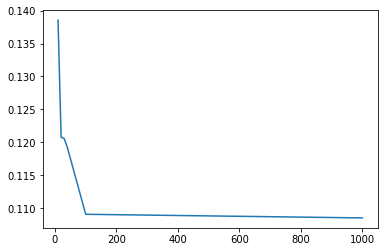

In [23]:
plt.plot(nums_trees_test1,error_num_trees)

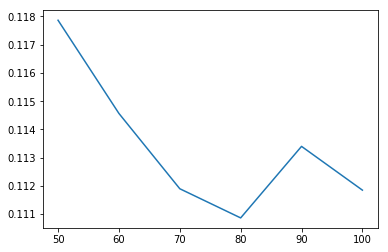

In [29]:
plt.plot(nums_trees_test2,error_num_trees)

Comment:
- As we can see from the two tests (the first is general search and the second narrows down the scope), the best number of trees is 80.

## Experiment with number of features

In [33]:
start = time.time()
num_features_test1 = [10, 20, 40, 50, 100, 200, 300, 400, 500, 600, 784]
num_features_test2 = [10, 15,20,25,30,35,40]
error_num_features = []
num_trees = 80
num_nodes = 1000

for i in num_features_test2:
    print(i)
    num_features = i
    clf = RandomForestClassifier(n_estimators=num_trees, min_samples_split=num_nodes,criterion="entropy", max_features=num_features)
    clf.fit(training, training_label)
    error_num_features.append(compute_error_rate(clf, train_val, train_val_label))
end = time.time()
print("Time elapsed:", end - start)

10
15
20
25
30
35
40
Time elapsed: 76.42705488204956


In [31]:
# test 1
error_num_features

[0.11103333333333333,
 0.10938333333333333,
 0.11181666666666666,
 0.11511666666666667,
 0.1182,
 0.1243,
 0.13495,
 0.1432,
 0.15431666666666666,
 0.16361666666666666,
 0.19125]

In [34]:
# test 2
error_num_features

[0.11023333333333334,
 0.1088,
 0.11013333333333333,
 0.10998333333333334,
 0.10818333333333334,
 0.10541666666666667,
 0.11501666666666667]

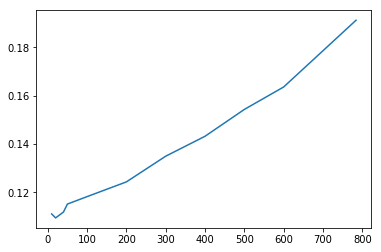

In [32]:
plt.plot(num_features_test1, error_num_features)

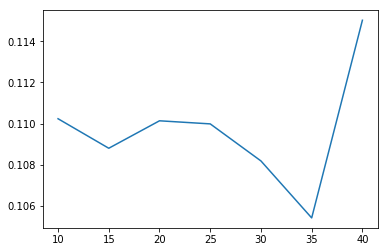

In [35]:
plt.plot(num_features_test2, error_num_features)

Comment:
 - As we can see from the two tests (the first is general search and the second narrows down the scope), the best number of features is 35.

## Experiment with minimum sample splits

In [41]:
start = time.time()
num_nodes_test1 = [10,20,30,40,100]
num_nodes_test2 = [2,3,4,5,6,7,8,9,10]
error_num_nodes = []
num_trees = 80
num_features = 35

for i in num_nodes_test2:
    print(i)
    num_nodes = i
    clf = RandomForestClassifier(n_estimators=num_trees, min_samples_split=num_nodes,criterion="entropy", max_features=num_features)
    clf.fit(training, training_label)
    error_num_nodes.append(compute_error_rate(clf, train_val, train_val_label))
end = time.time()
print("Time elapsed:", end - start)

2
3
4
5
6
7
8
9
10
Time elapsed: 237.48136806488037


In [37]:
# test 1
error_num_nodes

[0.007583333333333333, 0.013616666666666666, 0.02045, 0.0258, 0.04395]

In [42]:
# test 2
error_num_nodes

[0.005566666666666667,
 0.00565,
 0.005516666666666666,
 0.0057666666666666665,
 0.0058,
 0.006183333333333333,
 0.006533333333333334,
 0.006933333333333333,
 0.00735]

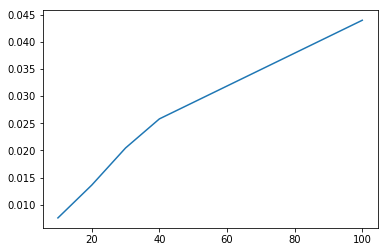

In [38]:
plt.plot(num_nodes_test1, error_num_nodes)

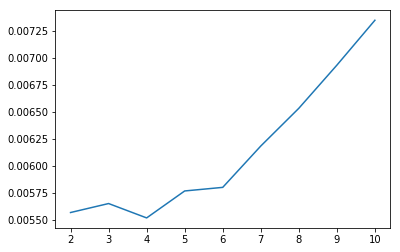

In [43]:
plt.plot(num_nodes_test2, error_num_nodes)

Comment:
 - As we can see from the two tests (the first is general search and the second narrows down the scope), the best minimum sample splits is 4.

## Test on Best Parameters

In [27]:
# Test on the best parameters
num_trees = 80
num_nodes = 4
num_features = 35
clf = RandomForestClassifier(n_estimators=num_trees, min_samples_split=num_nodes,criterion="entropy", max_features=num_features)
clf.fit(train_val, train_val_label)
test_error = compute_error_rate(clf, test, test_label)

In [28]:
test_error

0.0265

## (b) Boost Classifier

In [59]:
# First play around with random parameters
num_trees = 5
num_features = 5
num_nodes = 1000
num_estimators = 5

In [50]:
clfb = RandomForestClassifier(n_estimators=num_trees, min_samples_split=num_nodes,criterion="entropy", max_features=num_features)

In [51]:
adb = AdaBoostClassifier(clfb,n_estimators=num_estimators,algorithm='SAMME',random_state=12345)
adb.fit(training, training_label)

AdaBoostClassifier(algorithm='SAMME',
          base_estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features=5, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=1000,
            min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          learning_rate=1.0, n_estimators=5, random_state=12345)

In [52]:
val_pred = adb.predict(val)

In [53]:
np.count_nonzero(val_label - val_pred)

1510

Note: 
 - The number of error made is less than the classic random forest in part (a) when we played around with the same random parameters at the beginning.

In [30]:
# Function to experiment with parameters
def experiment_para(parameter, test):
    error = []
    for i in test:
        print(i)
        if parameter == 'num_trees':
            num_trees = i
        else:
            num_trees = 1
        if parameter == 'num_features':
            num_features = i
        else:
            num_features = 35
        if parameter == 'num_nodes':
            num_nodes = i
        else:
            num_nodes = 4
        if parameter == 'num_estimators':
            num_estimators = i;
        else:
            num_estimators = 10
        clfb = RandomForestClassifier(n_estimators=num_trees, min_samples_split=num_nodes,criterion="entropy", max_features=num_features)
        adb = AdaBoostClassifier(clfb,n_estimators=num_estimators,algorithm='SAMME',random_state=12345)
        adb.fit(training, training_label)
        error.append(compute_error_rate(adb, train_val, train_val_label))
    return error

## Experiment with number of trees

1
2
3
4
5
6
7
8
9
10


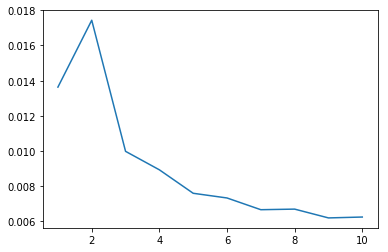

In [73]:
nums_trees_test1 = [1,2,3,4,5,6,7,8,9,10]
plt.plot(nums_trees_test1, experiment_para('num_trees', nums_trees_test1))
plt.show()

Comment:
 - As seen in the plot, the best number of trees is 9

## Experiment with number of features

10
20
40
50
100
400
784


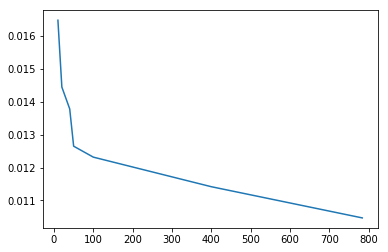

10
15
20
25
30
35
40


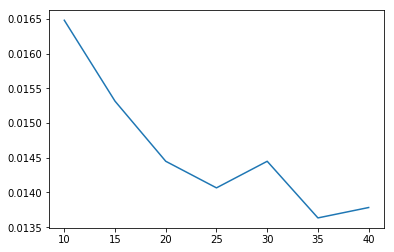

In [31]:
num_features_test1 = [10, 20, 40, 50, 100, 400, 784]
num_features_test2 = [10, 15,20,25,30,35,40]
error1 =  experiment_para('num_features', num_features_test1)
plt.plot(num_features_test1,error1)
plt.show()
error2 =  experiment_para('num_features', num_features_test2)
plt.plot(num_features_test2, error2)
plt.show()

In [34]:
error1

[0.016483333333333332,
 0.01445,
 0.013783333333333333,
 0.01265,
 0.012316666666666667,
 0.011416666666666667,
 0.010466666666666668]

In [35]:
error2

[0.016483333333333332,
 0.015316666666666666,
 0.01445,
 0.014066666666666667,
 0.01445,
 0.013633333333333334,
 0.013783333333333333]

Comment:
 - Combined the plots and printed error on two tests, the more feature there is, the lower the error rate. For efficiency consideration, we will choose 10 features since the accuracy is already very high.

## Experiment on minimum sample splits

10
20
30
40
100


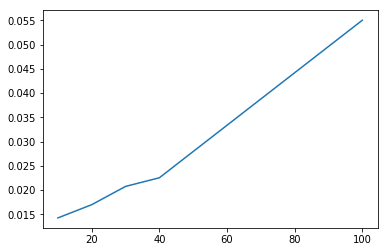

2
3
4
5
6
7
8
9
10


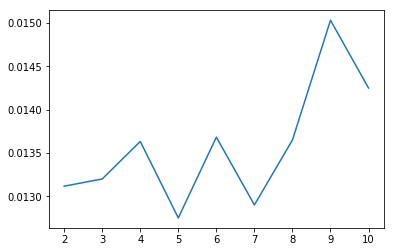

In [36]:
num_nodes_test1 = [10,20,30,40,100]
num_nodes_test2 = [2,3,4,5,6,7,8,9,10]
error1 =  experiment_para('num_nodes', num_nodes_test1)
plt.plot(num_nodes_test1, error1)
plt.show()
error2 =  experiment_para('num_nodes', num_nodes_test2)
plt.plot(num_nodes_test2, error2)
plt.show()

In [37]:
error1

[0.01425,
 0.016983333333333333,
 0.02075,
 0.022533333333333332,
 0.05503333333333333]

In [38]:
error2

[0.013116666666666667,
 0.0132,
 0.013633333333333334,
 0.01275,
 0.013683333333333334,
 0.0129,
 0.01365,
 0.015033333333333333,
 0.01425]

Comment:
 - As can be seen, the higher the number of nodes to stop growing the tree, the worse the performance. At a closer look at the first 10 numbers of nodes, we found the best number if 5.

## Experiment with number of trees in Adaboost Classifier

10
20
30
40
100


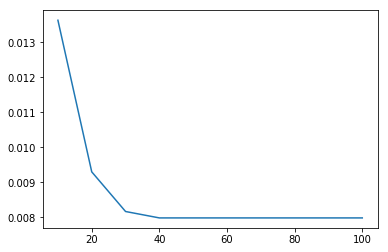

50
60
70
80
90
100


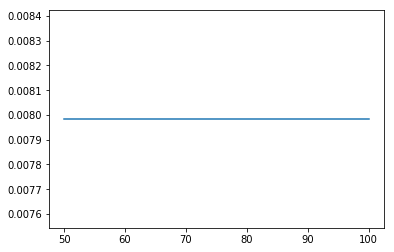

In [39]:
num_estimators_test1 = [10,20,30,40,100]
num_estimators_test2 = [50,60,70,80,90,100]
error1 = experiment_para('num_estimators', num_estimators_test1)
plt.plot(num_estimators_test1, error1)
plt.show()
error2 = experiment_para('num_estimators', num_estimators_test2)
plt.plot(num_estimators_test2, error2)
plt.show()

In [40]:
error1

[0.013633333333333334,
 0.0093,
 0.008166666666666666,
 0.007983333333333334,
 0.007983333333333334]

In [41]:
error2

[0.007983333333333334,
 0.007983333333333334,
 0.007983333333333334,
 0.007983333333333334,
 0.007983333333333334,
 0.007983333333333334]

Comment:
 - As can be seen from the plots and printed errors, the error rate stops to drop when number of trees is higher than 40. We will pick 40.

## Test on best parameters

In [43]:
# Test on best parameters
num_trees = 9
num_features = 10
num_nodes = 5
num_estimators = 40
clfb = RandomForestClassifier(n_estimators=num_trees, min_samples_split=num_nodes,criterion="entropy",\
                              max_features=num_features)
adb = AdaBoostClassifier(clfb,n_estimators=num_estimators,algorithm='SAMME',random_state=12345)
adb.fit(train_val, train_val_label)
test_error = compute_error_rate(adb, test, test_label)

In [44]:
test_error

0.032

Comment:
 - The error rate is higher than in part (a), but the error rate in part(a) is very low, could be that the parameters are optimized but here in part(b) for efficiency consideration the parameters are not exactly optimized. This model already performs very well.

## (c) A Different Boosting Reweighting Rule

Implement a different boosting reweighting rule,  wherewi=wi∗1/e,  for each misclassified example.  To do this you will need to grow trees one by one.  The clf.fit function  has  a  parameter weights which  allows  you  to  train  the  tree with your own weights on the data points.  In this protocol you do not use the β’s, rather you aggregate the trees as in random forest by averaging the terminal probabilities of all the trees.  Perform the same comparisons you did in (a),(b) with this protocol.

In [46]:
# Function to update weights
def update_weights(model, weights):
    pred = model.predict(training)
    ind = np.nonzero(pred - training_label)
    e = sum(weights[ind])
    for i in ind:
        weights[i] = weights[i]/e
    weights = weights / sum(weights)
    return weights

In [110]:
# Try with the best parameters in part (a)
# Grow trees one by one
num_nodes = 4
num_features = 35
num_trees = 1
w = np.float64([1/50000]*50000)
trees = []
for i in range(80):
    print(i)
    clf = RandomForestClassifier(n_estimators=num_trees, min_samples_split=num_nodes,\
                                    criterion="entropy", max_features=num_features)
    clf.fit(training, training_label, sample_weight = w)
    trees.append(clf)
    w = update_weights(clf, w)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79


In [111]:
prob = np.zeros((10000, 10))
for clf in trees:
    prob = prob + clf.predict_proba(val)
prob = prob / len(trees)
pred = np.array([np.argmax(prob[i]) for i in range(prob.shape[0])])
error = np.count_nonzero(pred - val_label) / pred.shape[0]

In [112]:
error

0.0354

Comment: 
 - The error rate is a little bit higher than in part(a) with the same parameters, but still in a good performance.
 - The error rate is similar to that in part(b) but a little bit higher. 
 - The parameters could be better tuned.

## (d) SVM

In [4]:
from sklearn.svm import SVC

In [18]:
gsvm = SVC(kernel="rbf", C = 1/100)

In [19]:
start = time.time()
gsvm.fit(training[:50000], training_label[:50000])
end = time.time()
print("Time elapsed:", end - start)

Time elapsed: 10456.457587003708


In [20]:
start = time.time()
svm_acc = gsvm.score(val,val_label)
end = time.time()
print("Time elapsed:", end - start)

Time elapsed: 429.6975769996643


In [17]:
svm_acc

0.8972

Comment:
 - The SVM is much slower to fit and predict. The fitting time is longer than the predict time. As the number of data grows, the time required to fit grows in a non linear way.
 - The accuracy is lower than the random forest. In this case, the random forest is both faster and more accurate.